In [2]:
import pandas as pd

df = pd.read_pickle('df.pkl')

# Dataset basic analysis

In [3]:
print(f"Number of columns: {len(df.columns)}")
print(f"Columns: {', '.join(list(df.columns))}")
print(f"Number of rows: {len(df)}")
print("Data types:")
for col, dtype in df.dtypes.items():
    print(f"\t{col}: {dtype}")

print("First rows")
print(df.head())

Number of columns: 180
Columns: value_target, class_target, well_plate_name, wp_image_version, wp_image_prop, well_name, mock, FNumber, FocalLengthIn35mmFilm, ISOSpeedRatings, Orientation, ExposureTime, FocalLength, Flash, MeteringMode, MaxApertureValue, ExposureBiasValue, BrightnessValue, ApertureValue, ShutterSpeedValue, full_gray_mean, full_gray_stddev, full_gray_mean_trm30, full_gray_skewness, full_gray_entropy, full_gray_entropy2, full_gray_entropy_glcm, full_gray_mean_PIL, full_blue_mean, full_blue_stddev, full_blue_mean_trm30, full_blue_skewness, full_blue_entropy, full_blue_entropy2, full_blue_entropy_glcm, full_blue_mean_PIL, full_green_mean, full_green_stddev, full_green_mean_trm30, full_green_skewness, full_green_entropy, full_green_entropy2, full_green_entropy_glcm, full_green_mean_PIL, full_red_mean, full_red_stddev, full_red_mean_trm30, full_red_skewness, full_red_entropy, full_red_entropy2, full_red_entropy_glcm, full_red_mean_PIL, full_L_mean, full_L_stddev, full_L_mean

# Theory

CFU stands for Colony Forming Units, which is a measure used in microbiology to estimate the number of viable bacteria or fungal cells in a sample. It's not a direct measurement of the total quantity of bacteria, but rather a measure of the number of cells capable of dividing and forming colonies.

In simple words, it is the number of "units of bacteria" capable of forming colonies.

# Features Analysis

In [4]:
# Print first record iterating on columns
print("First record:")
for col in df.columns:
    print(f"\t{col}: {df[col][0]}")

LABEL_COLUMNS = ["value_target", "class_target"]
FEATURES_COLUMNS = [col for col in df.columns if col not in LABEL_COLUMNS]
print(f"{FEATURES_COLUMNS = }")
GIVEN_NUMERIC_FEATURES = [col for col in FEATURES_COLUMNS if pd.api.types.is_numeric_dtype(df[col])]
GIVEN_CATEGORICAL_FEATURES = [col for col in FEATURES_COLUMNS if pd.api.types.is_categorical_dtype(df[col]) or pd.api.types.is_object_dtype(df[col])]
print(f"{GIVEN_NUMERIC_FEATURES = }")
print(f"{GIVEN_CATEGORICAL_FEATURES = }")

CATEGORICAL_FEATURES = [
    'well_plate_name',
    'wp_image_version',
    'well_name',
    'mock'
]

CATEGORICAL_FEATURES = [col for col in CATEGORICAL_FEATURES]
NUMERIC_FEATURES = [col for col in FEATURES_COLUMNS if col not in CATEGORICAL_FEATURES]
print(f"{NUMERIC_FEATURES = }")
print(f"{CATEGORICAL_FEATURES = }")

# Print difference between GIVEN_CATEGORICAL_FEATURES and CATEGORICAL_FEATURES
NUMERIC_FEATURES_GIVEN_AS_CATEGORICAL = list(set(GIVEN_CATEGORICAL_FEATURES) - set(CATEGORICAL_FEATURES))
CATEGORICAL_FEATURES_GIVEN_AS_NUMERIC = list(set(GIVEN_NUMERIC_FEATURES) - set(NUMERIC_FEATURES))
print(f"Features in GIVEN_CATEGORICAL_FEATURES and not in CATEGORICAL_FEATURES: {NUMERIC_FEATURES_GIVEN_AS_CATEGORICAL}")
print(f"Features in CATEGORICAL_FEATURES and not in GIVEN_CATEGORICAL_FEATURES: {CATEGORICAL_FEATURES_GIVEN_AS_NUMERIC}")

# Convert columns to right dtypes
df_converted = df.copy()
for col in NUMERIC_FEATURES_GIVEN_AS_CATEGORICAL:
    df_converted[col] = df_converted[col].astype('float64')

for col in CATEGORICAL_FEATURES_GIVEN_AS_NUMERIC:
    df_converted[col] = df_converted[col].astype('category')

# Print dtypes
print("Data types:")
for col, dtype in df_converted.dtypes.items():
    print(f"\t{col}: {dtype}")

First record:
	value_target: 1.158
	class_target: 10^8 CFU:mL
	well_plate_name: 05
	wp_image_version: 05_0
	wp_image_prop: 0.0
	well_name: A1
	mock: False
	FNumber: 1.7
	FocalLengthIn35mmFilm: 0.0
	ISOSpeedRatings: 226.0
	Orientation: 1.0
	ExposureTime: 0.020003
	FocalLength: 4.71
	Flash: 16.0
	MeteringMode: 2.0
	MaxApertureValue: 0.0
	ExposureBiasValue: 0.0
	BrightnessValue: 8.7
	ApertureValue: 1.53
	ShutterSpeedValue: 5.614
	full_gray_mean: 76.37894375857339
	full_gray_stddev: 42.19194116854811
	full_gray_mean_trm30: 89.51971710244321
	full_gray_skewness: -0.985075922379453
	full_gray_entropy: 4.823225765539228
	full_gray_entropy2: 3.3432053405876
	full_gray_entropy_glcm: 7.1244046874085125
	full_gray_mean_PIL: 76.37894375857339
	full_blue_mean: 66.73251028806584
	full_blue_stddev: 38.11588827465449
	full_blue_mean_trm30: 75.86755250750107
	full_blue_skewness: -0.7398326957511079
	full_blue_entropy: 4.923509474933315
	full_blue_entropy2: 3.4127167110102032
	full_blue_entropy_glcm: 7.

/tmp/ipykernel_2385/2952855254.py:10: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  GIVEN_CATEGORICAL_FEATURES = [col for col in FEATURES_COLUMNS if pd.api.types.is_categorical_dtype(df[col]) or pd.api.types.is_object_dtype(df[col])]


Data types:
	value_target: float64
	class_target: object
	well_plate_name: object
	wp_image_version: object
	wp_image_prop: float64
	well_name: object
	mock: category
	FNumber: float64
	FocalLengthIn35mmFilm: float64
	ISOSpeedRatings: float64
	Orientation: float64
	ExposureTime: float64
	FocalLength: float64
	Flash: float64
	MeteringMode: float64
	MaxApertureValue: float64
	ExposureBiasValue: float64
	BrightnessValue: float64
	ApertureValue: float64
	ShutterSpeedValue: float64
	full_gray_mean: float64
	full_gray_stddev: float64
	full_gray_mean_trm30: float64
	full_gray_skewness: float64
	full_gray_entropy: float64
	full_gray_entropy2: float64
	full_gray_entropy_glcm: float64
	full_gray_mean_PIL: float64
	full_blue_mean: float64
	full_blue_stddev: float64
	full_blue_mean_trm30: float64
	full_blue_skewness: float64
	full_blue_entropy: float64
	full_blue_entropy2: float64
	full_blue_entropy_glcm: float64
	full_blue_mean_PIL: float64
	full_green_mean: float64
	full_green_stddev: float64
	f

In [5]:
# Drop features
# Print the unique values of the column "mock" and "Orientation"
check_unique_columns = ["mock", "Orientation", "wp_image_prop", "ExposureTime", "FocalLength", "MaxApertureValue", "ExposureBiasValue",	"BrightnessValue","ApertureValue", "ShutterSpeedValue"]
for col in check_unique_columns:
    print(f"Unique values of the column '{col}': {df_converted[col].unique()}")

# Drop the column "mock"
# df = df.drop(columns=["mock"])

# Drop all columns with only one unique value
df_dropped = df_converted.copy()
dropped_columns = {}
for col in df_converted.columns:
    unique_values = df_converted[col].unique()
    if len(unique_values) == 1:
        print(f"Dropping column '{col}' with unique value: {unique_values[0]}")
        dropped_columns[col] = unique_values[0]
        df_dropped = df_dropped.drop(columns=[col])
print(f"Dropped {len(dropped_columns)} columns with unique values:")
for col, value in dropped_columns.items():
    print(f"\t'{col}' with unique value: {value}")

NUMERIC_FEATURES = [col for col in NUMERIC_FEATURES if col in df_dropped.columns]
CATEGORICAL_FEATURES = [col for col in CATEGORICAL_FEATURES if col in df_dropped.columns]
print(f"{NUMERIC_FEATURES = }")
print(f"{CATEGORICAL_FEATURES = }")


Unique values of the column 'mock': [False]
Categories (1, bool): [False]
Unique values of the column 'Orientation': [1.]
Unique values of the column 'wp_image_prop': [0.]
Unique values of the column 'ExposureTime': [0.020003 0.010001 0.010002 0.005001 0.009971 0.00924  0.0091   0.00904
 0.008689 0.00988  0.00472  0.009412 0.009504 0.00956  0.009106 0.00944
 0.00962  0.009314 0.004985]
Unique values of the column 'FocalLength': [4.71]
Unique values of the column 'MaxApertureValue': [0.]
Unique values of the column 'ExposureBiasValue': [0.]
Unique values of the column 'BrightnessValue': [ 8.7  8.3  8.5  8.2  7.6  7.8  8.4  7.5  8.   7.9  8.1  8.6  7.7  8.8
  8.9  9.   9.2  9.1  9.4  9.3  7.3  7.4  9.8  9.5  9.6  9.9  9.7 10.6
 10.8 10.3 10.9 10.2 11.2 11.1 11.3 11.4 11.  10.7 10.5]
Unique values of the column 'ApertureValue': [1.53]
Unique values of the column 'ShutterSpeedValue': [5.614 6.629 7.636 6.643 6.754 6.768 6.781 6.845 6.658 7.721 6.727 6.714
 6.7   6.686 6.741 7.643]
Dropping

# Missing Data Analysis

## Categorical features conversion in numeric features

One-hot encoded DataFrame columns: Index(['value_target', 'class_target', 'ISOSpeedRatings', 'ExposureTime',
       'BrightnessValue', 'ShutterSpeedValue', 'full_gray_mean',
       'full_gray_stddev', 'full_gray_mean_trm30', 'full_gray_skewness',
       'full_gray_entropy', 'full_gray_entropy2', 'full_gray_entropy_glcm',
       'full_gray_mean_PIL', 'full_blue_mean', 'full_blue_stddev',
       'full_blue_mean_trm30', 'full_blue_skewness', 'full_blue_entropy',
       'full_blue_entropy2', 'full_blue_entropy_glcm', 'full_blue_mean_PIL',
       'full_green_mean', 'full_green_stddev', 'full_green_mean_trm30',
       'full_green_skewness', 'full_green_entropy', 'full_green_entropy2',
       'full_green_entropy_glcm', 'full_green_mean_PIL', 'full_red_mean',
       'full_red_stddev', 'full_red_mean_trm30', 'full_red_skewness',
       'full_red_entropy', 'full_red_entropy2', 'full_red_entropy_glcm',
       'full_red_mean_PIL', 'full_L_mean', 'full_L_stddev',
       'full_L_mean_trm30', 'full_L

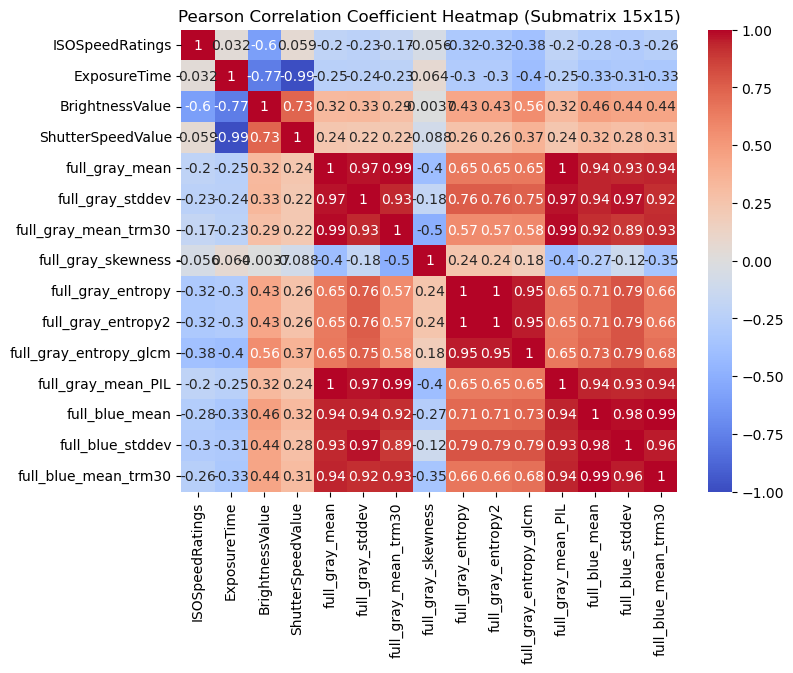

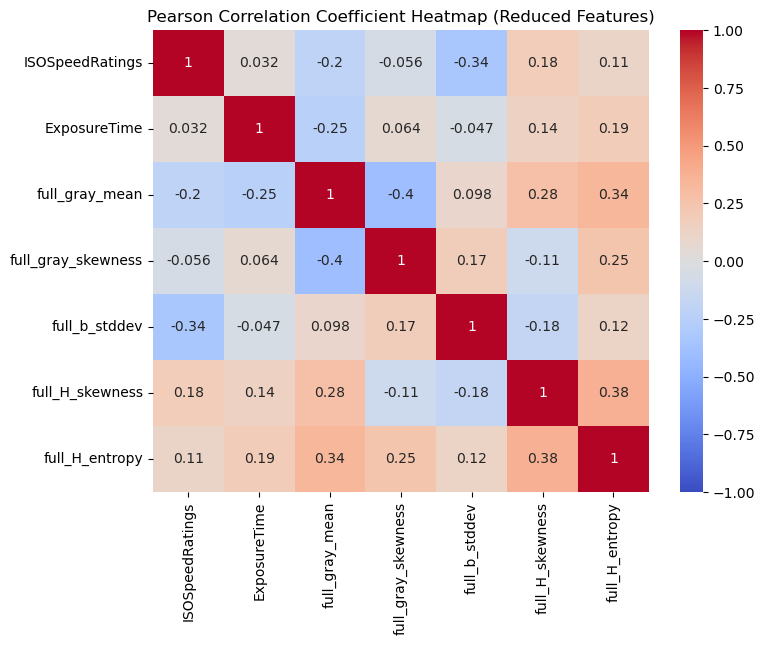

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Feature selection

## Convert categorical features to one-hot encoding
df_onehot = pd.get_dummies(df_dropped, columns=CATEGORICAL_FEATURES)
# TEMP
df_onehot = df_onehot.iloc[:, :100]
print("One-hot encoded DataFrame columns:", df_onehot.columns)

## Pearson correlation coefficient
SUBMATRIX_SIZE = 15
FEATURES_COLUMNS = [col for col in df_onehot.columns if col not in LABEL_COLUMNS]
correlation_matrix = df_onehot[FEATURES_COLUMNS].corr(method='pearson')

### Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix.iloc[:SUBMATRIX_SIZE, :SUBMATRIX_SIZE], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f'Pearson Correlation Coefficient Heatmap (Submatrix {SUBMATRIX_SIZE}x{SUBMATRIX_SIZE})')
plt.show()

### Set the correlation threshold
threshold = 0.6

### Create a mask to identify columns to drop
to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            to_drop.add(colname)

### Drop the identified columns
df_onehot_dropped = df_onehot.drop(columns=to_drop)

### Print the resulting DataFrame
# print("Features after dropping highly correlated columns:")
# print(df_onehot_dropped)

### Plot the heatmap of the remaining features
FEATURES_COLUMNS = [col for col in df_onehot_dropped.columns if col not in LABEL_COLUMNS]
plt.figure(figsize=(8, 6))
sns.heatmap(df_onehot_dropped[FEATURES_COLUMNS].corr(method='pearson'), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Coefficient Heatmap (Reduced Features)')
plt.show()

## Chi squared feature selection

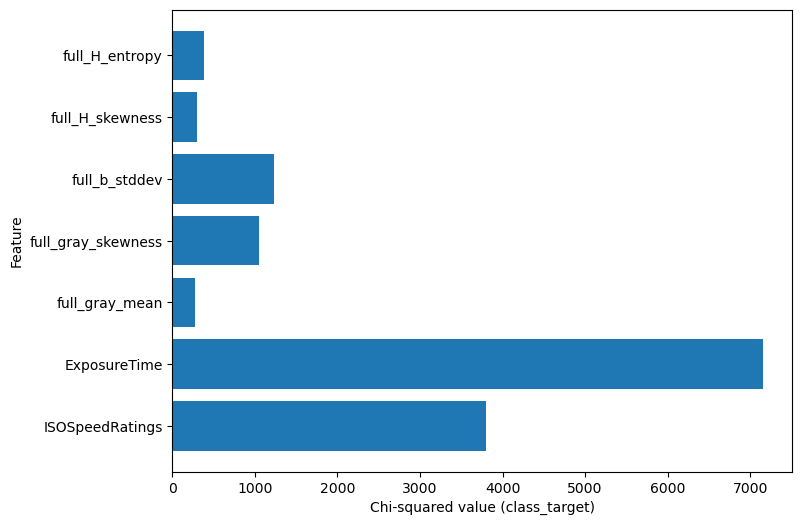

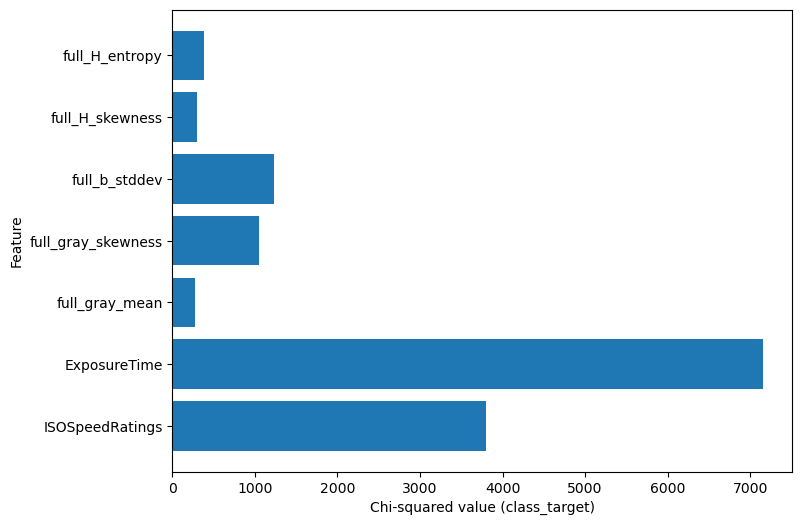

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

# Convert categorical target to numeric values
le = LabelEncoder()
y = le.fit_transform(df["class_target"])

# Select categorical features for chi-squared test
FEATURES_COLUMNS = [col for col in df_onehot_dropped.columns if col not in LABEL_COLUMNS]

# Apply non-negative transformation to the input data
scaler = MinMaxScaler()
X = scaler.fit_transform(df_onehot_dropped[FEATURES_COLUMNS])

# Chi-squared test
chi2_values, p_values = chi2(X, y)

# Create a plot for the chi-squared values
plt.figure(figsize=(8, 6))
plt.barh(FEATURES_COLUMNS, chi2_values)
plt.xlabel('Chi-squared value (class_target)')
plt.ylabel('Feature')
le = LabelEncoder()
y = le.fit_transform(df["class_target"])
plt.show()

# Drop columns with chi-squared value below a threshold
threshold = 0.1
to_drop = [col for col, chi2_val in zip(FEATURES_COLUMNS, chi2_values) if chi2_val < threshold]
df_onehot_dropped_chi2 = df_onehot_dropped.drop(columns=to_drop)

# Create a new plot for the Chi-squared values
FEATURES_COLUMNS = [col for col in df_onehot_dropped_chi2.columns if col not in LABEL_COLUMNS]
chi2_values, _ = chi2(X, y)
plt.figure(figsize=(8, 6))
plt.barh(FEATURES_COLUMNS, chi2_values)
plt.xlabel('Chi-squared value (class_target)')
plt.ylabel('Feature')
plt.show()

# TODO - CHECK: understand why since value_target is continuous, it is not possible to apply chi-squared test
# # Do the same for value_target (numeric feature)
# # Apply non-negative transformation to the input data
# scaler = MinMaxScaler()
# X = scaler.fit_transform(df_onehot_dropped_chi2[FEATURES_COLUMNS])
# y = df["value_target"]

# # Chi-squared test
# chi2_values, p_values = chi2(X, y)

# # Create a plot for the chi-squared values
# plt.figure(figsize=(8, 6))
# plt.barh(FEATURES_COLUMNS, chi2_values)
# plt.xlabel('Chi-squared value (value_target)')
# plt.ylabel('Feature')
# plt.show()

# # Drop columns with chi-squared value below a threshold
# threshold = 0.1
# to_drop = [col for col, chi2_val in zip(FEATURES_COLUMNS, chi2_values) if chi2_val < threshold]
# df_onehot_dropped_chi2 = df_onehot_dropped_chi2.drop(columns=to_drop)

# # Create a new plot for the Chi-squared values
# FEATURES_COLUMNS = [col for col in df_onehot_dropped_chi2.columns if col not in LABEL_COLUMNS]
# chi2_values, _ = chi2(X, y)
# plt.figure(figsize=(8, 6))
# plt.barh(FEATURES_COLUMNS, chi2_values)
# plt.xlabel('Chi-squared value (value_target)')
# plt.ylabel('Feature')
# plt.show()



# Missing Data Analysis

## Class analysis

Number of classes: 6
Classes: ['0000 CFU:mL', '10^1 CFU:mL', '10^2 CFU:mL', '10^4 CFU:mL', '10^6 CFU:mL', '10^8 CFU:mL']
Number of samples in class "0000 CFU:mL": 11616
Number of samples in class "10^1 CFU:mL": 12672
Number of samples in class "10^2 CFU:mL": 11232
Number of samples in class "10^4 CFU:mL": 8544
Number of samples in class "10^6 CFU:mL": 13056
Number of samples in class "10^8 CFU:mL": 4896


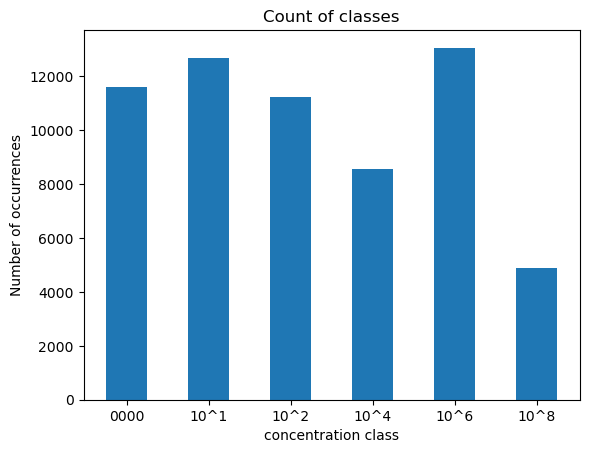

In [8]:
# Find classes
# classes = df['class_target'].unique()
classes = sorted(df['class_target'].unique())
print(f"Number of classes: {len(classes)}")
print(f"Classes: {classes}")

# Find number of samples per class
# classes_counts = df['class_target'].value_counts()
# print(classes_counts)
classes_counts = []
for c in classes:
    class_count = len(df[df['class_target'] == c])
    classes_counts.append(class_count)
    print(f"Number of samples in class \"{c}\": {class_count}")

# # Get distribution of gold concentration
import matplotlib.pyplot as plt

# Count the occurrences of value_target in each interval
# intervals = list(range(1, len(classes) + 1))
intervals = [class_name.strip(" CFU:mL") for class_name in classes]
# Plot the histogram
plt.bar(intervals, classes_counts, width=0.5)

# Set the labels and title
plt.xlabel('concentration class')
plt.ylabel('Number of occurrences')
plt.title('Count of classes')

# Show the plot
plt.show()


## Regression analysis

Max concentration: 1.521
Min concentration: 0.184
intervals: [0.184, 0.189348, 0.194696, 0.200044, 0.205392, 0.21073999999999998, 0.216088, 0.221436, 0.22678399999999999, 0.232132, 0.23748, 0.242828, 0.248176, 0.25352399999999997, 0.258872, 0.26422, 0.269568, 0.274916, 0.28026399999999996, 0.285612, 0.29096, 0.296308, 0.301656, 0.307004, 0.31235199999999996, 0.3177, 0.323048, 0.328396, 0.333744, 0.33909199999999995, 0.34443999999999997, 0.349788, 0.355136, 0.36048399999999997, 0.365832, 0.37117999999999995, 0.376528, 0.381876, 0.387224, 0.392572, 0.39791999999999994, 0.40326799999999996, 0.408616, 0.413964, 0.41931199999999996, 0.42466, 0.43000799999999995, 0.43535599999999997, 0.440704, 0.44605199999999995, 0.45139999999999997, 0.456748, 0.46209599999999995, 0.46744399999999997, 0.472792, 0.47813999999999995, 0.483488, 0.488836, 0.49418399999999996, 0.499532, 0.50488, 0.5102279999999999, 0.515576, 0.5209239999999999, 0.526272, 0.53162, 0.5369679999999999, 0.542316, 0.5476639999999999,

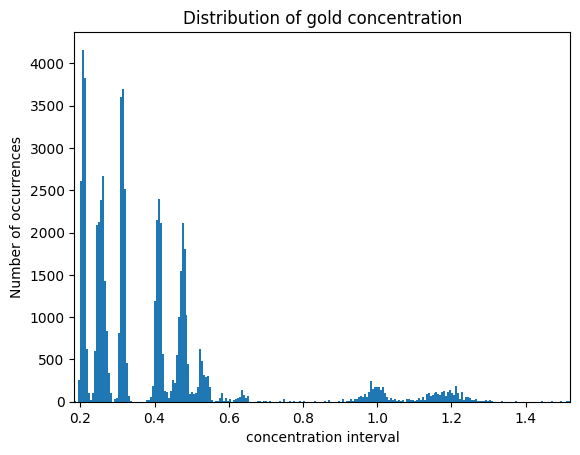

In [23]:
# Get distribution of gold concentration
import matplotlib.pyplot as plt

# Get the maximum and minimum values of value_target
max_value = df['value_target'].max()
min_value = df['value_target'].min()

print(f"Max concentration: {max_value}")
print(f"Min concentration: {min_value}")

# Calculate the step size
number_of_intervals = 250
step_size = (max_value - min_value) / number_of_intervals
intervals = [min_value + i * step_size for i in range(number_of_intervals + 1)]
print(f"intervals: {intervals}")

# Count the occurrences of value_target in each interval
value_counts, _, _ = plt.hist(df['value_target'], bins=intervals)

# Plot the histogram
plt.bar(intervals[:-1], value_counts, width=step_size, align='edge')

# Set the labels and title
plt.xlabel('concentration interval')
plt.ylabel('Number of occurrences')
plt.title('Distribution of gold concentration')

# Adjust x-axis to start from 0
plt.xlim(min(intervals), max(intervals))

# Show the plot
plt.show()


Percentage of missing values per column:
value_target: 0.0%
class_target: 0.0%
well_plate_name: 0.0%
wp_image_version: 0.0%
wp_image_prop: 0.0%
well_name: 0.0%
mock: 0.0%
FNumber: 0.0%
FocalLengthIn35mmFilm: 0.0%
ISOSpeedRatings: 0.0%
Orientation: 0.0%
ExposureTime: 0.0%
FocalLength: 0.0%
Flash: 0.0%
MeteringMode: 0.0%
MaxApertureValue: 0.0%
ExposureBiasValue: 0.0%
BrightnessValue: 0.0%
ApertureValue: 0.0%
ShutterSpeedValue: 0.0%
full_gray_mean: 0.0%
full_gray_stddev: 0.0%
full_gray_mean_trm30: 0.0%
full_gray_skewness: 0.0%
full_gray_entropy: 0.0%
full_gray_entropy2: 0.0%
full_gray_entropy_glcm: 0.0%
full_gray_mean_PIL: 0.0%
full_blue_mean: 0.0%
full_blue_stddev: 0.0%
full_blue_mean_trm30: 0.0%
full_blue_skewness: 0.0%
full_blue_entropy: 0.0%
full_blue_entropy2: 0.0%
full_blue_entropy_glcm: 0.0%
full_blue_mean_PIL: 0.0%
full_green_mean: 0.0%
full_green_stddev: 0.0%
full_green_mean_trm30: 0.0%
full_green_skewness: 0.0%
full_green_entropy: 0.0%
full_green_entropy2: 0.0%
full_green_entrop

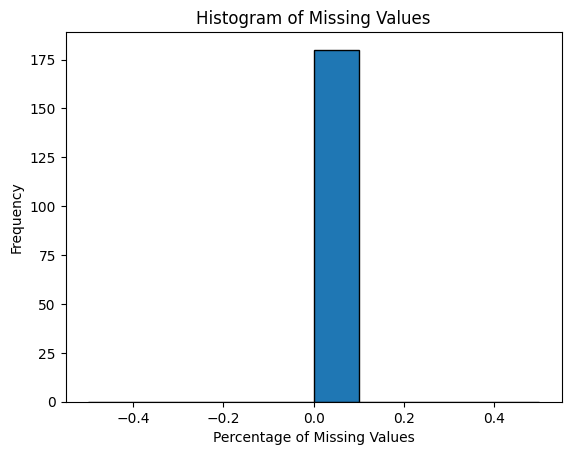

In [33]:
import numpy as np

print("Percentage of missing values per column:")
pct_missings = []
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())*100
    pct_missings.append(pct_missing)
    print(f'{col}: {pct_missing}%')

print(f"Mean percentage of missing values: {np.mean(pct_missings)}")

# Print the histogram of missing values using matplotlib
import matplotlib.pyplot as plt

# pct_missings = pct_missings + [0.1] * (100) + [0.05] * (100)  + [0.06] * (100)

fig, ax = plt.subplots()
ax.hist(pct_missings, bins=10, edgecolor='black')
ax.set_title('Histogram of Missing Values')
ax.set_xlabel('Percentage of Missing Values')
ax.set_ylabel('Frequency')
plt.show()

## Outlier Analysis

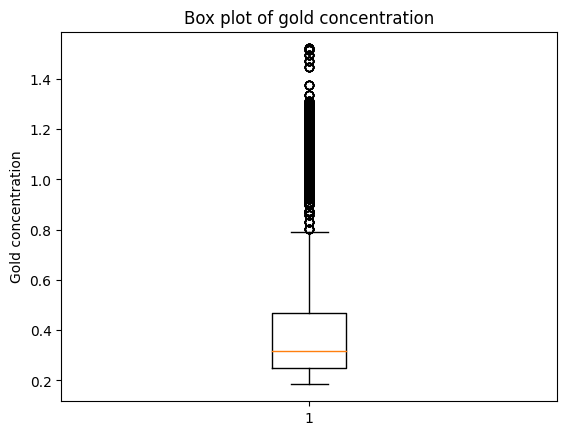

Number of outliers: 40


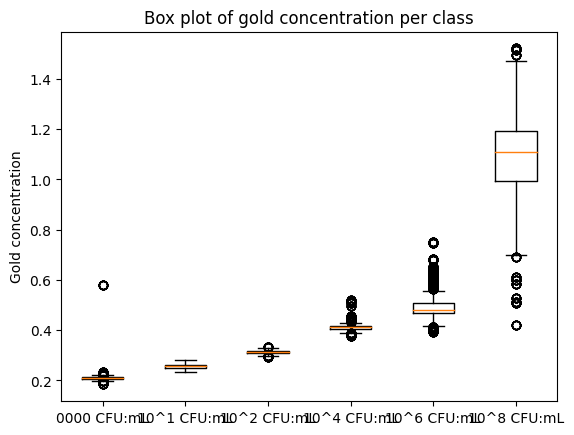

In [ ]:
# Box plot of the gold concentration
import matplotlib.pyplot as plt

plt.boxplot(df['value_target'])
plt.title('Box plot of gold concentration')
plt.ylabel('Gold concentration')
plt.show()

# Count number of outliers
# # Count number of occurrences greater than 3 standard deviations from the mean
# mean = df['value_target'].mean()
# std = df['value_target'].std()
# outliers = df[(df['value_target'] > mean + 3 * std) | (df['value_target'] < mean - 3 * std)]
# print(f"Number of outliers: {len(outliers)}")

# Count number of occurrences greater than max_value or less than min_value
max_value = 1.4
min_value = 0.7

# outliers = df[(df['value_target'] > max_value) | (df['value_target'] < min_value)]
outliers = df[(df['value_target'] > max_value)]
print(f"Number of outliers: {len(outliers)}")

# Box plot of the gold concentration per class
import matplotlib.pyplot as plt

# Create a list of gold concentrations per class
class_values = []
for c in classes:
    class_values.append(df[df['class_target'] == c]['value_target'])

# Create a box plot
plt.boxplot(class_values)
plt.title('Box plot of gold concentration per class')
plt.ylabel('Gold concentration')
plt.xticks(range(1, len(classes) + 1), classes)
plt.show()

# Dimentionality reduction

Explained variance ratio: [0.63283236 0.15407569 0.10163245]


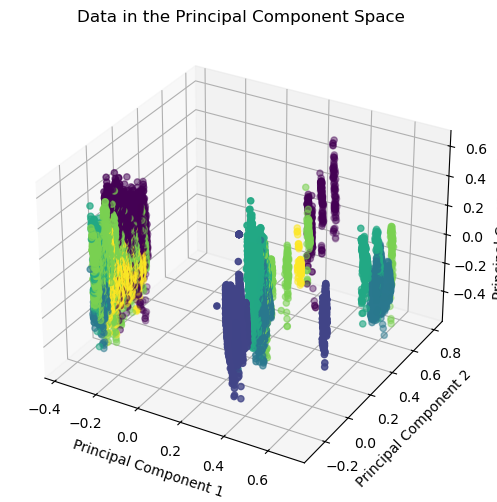

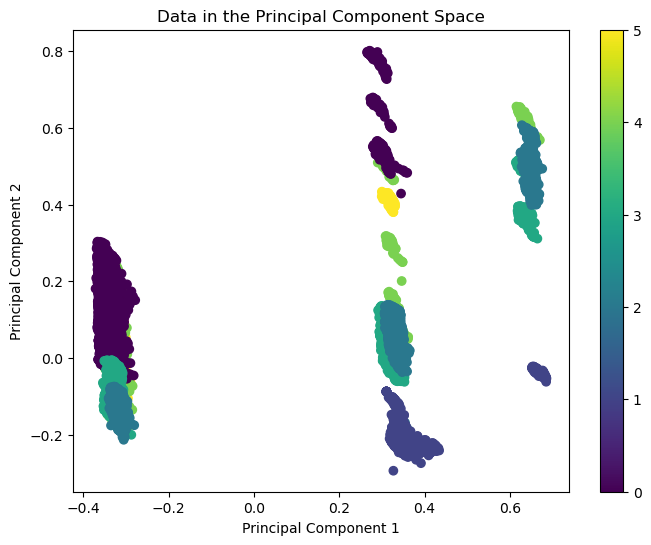

In [16]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Set the number of components
n_components = 3

# Create an instance of PCA with the desired number of components
pca = PCA(n_components=n_components)

# Fit the PCA model to your data
pca.fit(X)

# Transform the data to the principal components
X_pca = pca.transform(X)

# Print the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance_ratio}")

# # Plot the data in the principal component space
# plt.scatter(X_pca[:, 0], X_pca[:, 1])
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA')
# plt.show()

# Plot the data in the principal component space
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Data in the Principal Component Space')
plt.show()


# Plot the data in the principal component space
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data in the Principal Component Space')
plt.colorbar()



# Classification

Algorithms we can use:
- K-means
- K-medoids
- Hierarchical clustering

## K-means and K-medoids

### Data pre processing

## Hierarchical clustering

### Data pre processing

## Deep learning

### Data pre processing